# Analyse de données

#### Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


### Preapration du dataset

In [30]:
df = pd.read_csv('data/bcw_data.csv', sep=',')

df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


#### Le dataset contient 569 entrées et 32 colonnes, dont la variable cible est "diagnosis", qui indique si une tumeur est bénigne ("B") ou maligne ("M").
#### Les données se composent principalement de variables quantitatives continues (mesures des propriétés des tumeurs), sauf pour la colonne "diagnosis" qui est une variable qualitative catégorique

### Suppression des doublons 

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.dropna(inplace=True)

In [33]:
print("Missing values in each column:")
df.info()

Missing values in each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


### Visualisation des données

In [34]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


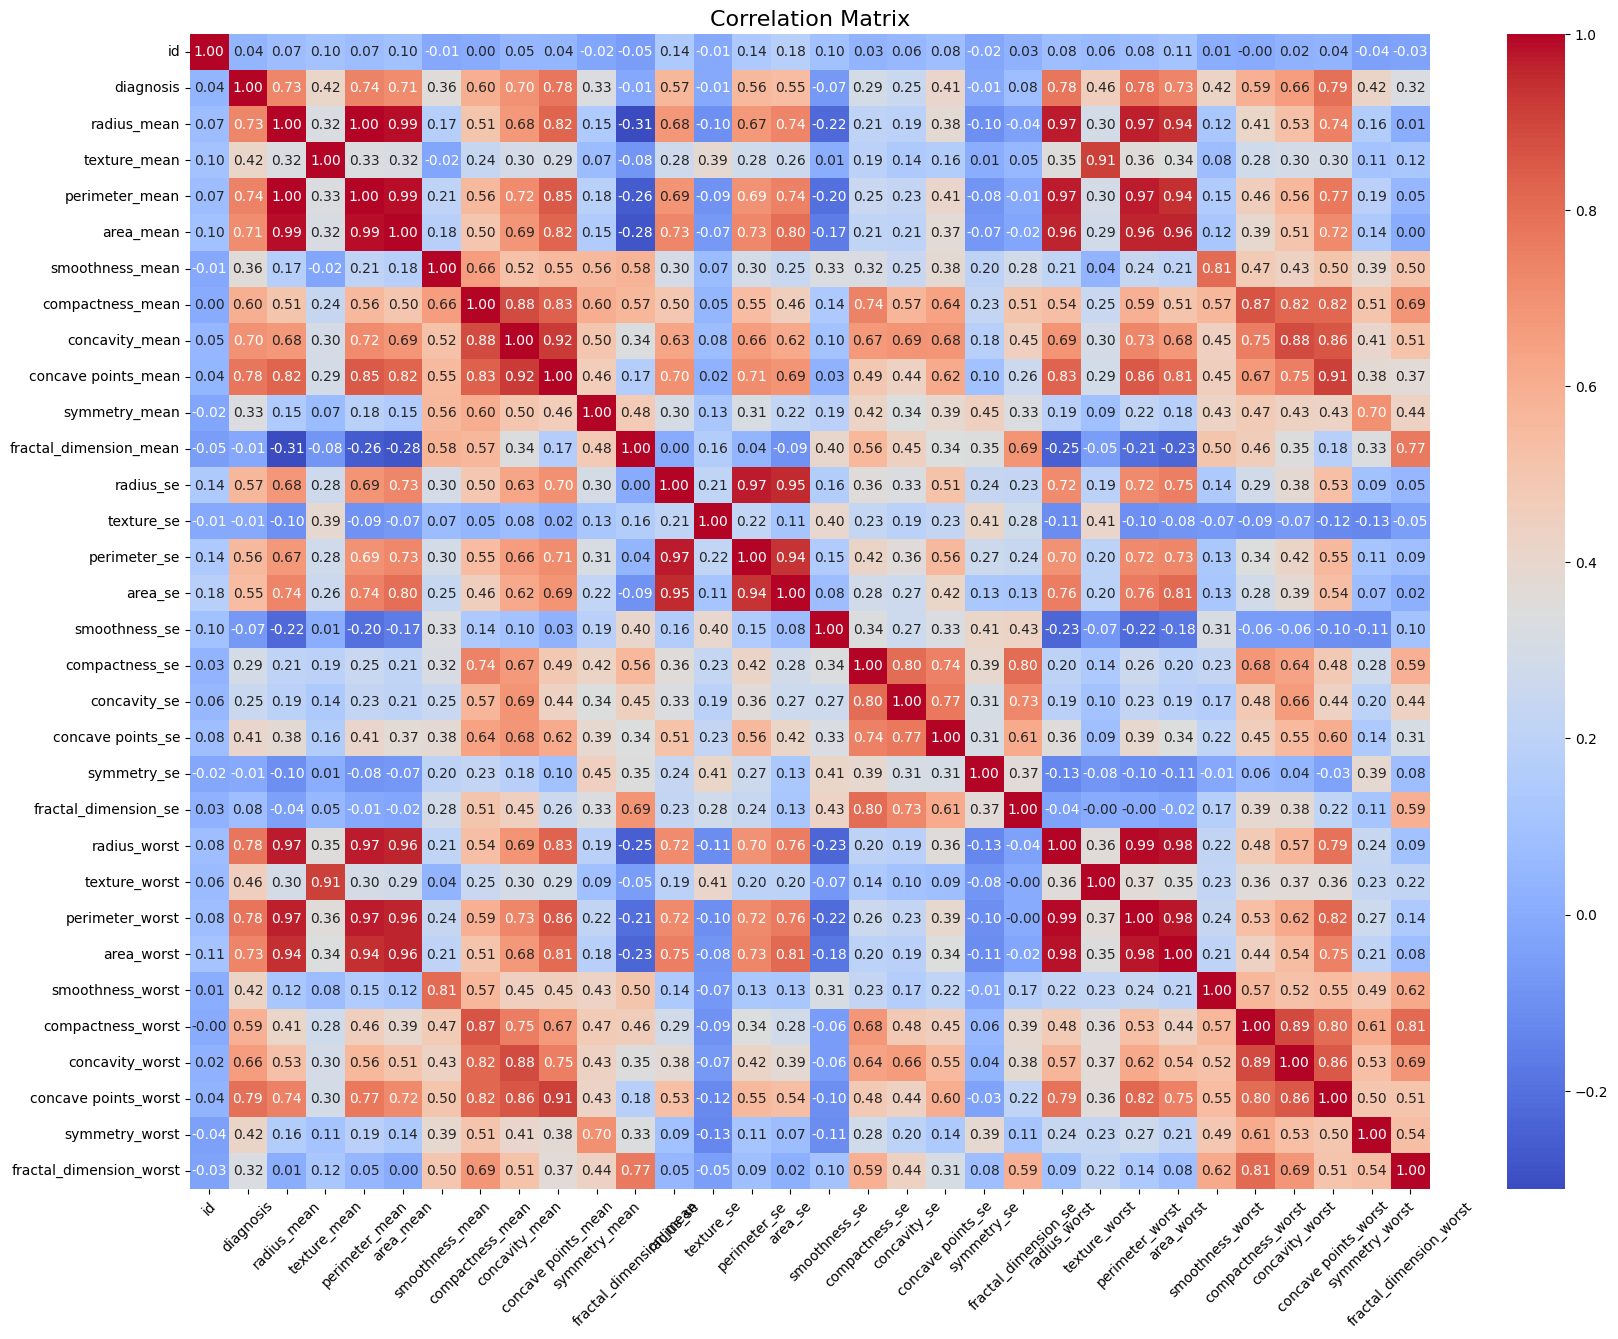

In [35]:

# Calculer la matrice de corrélation
corr = df.corr()


# Générer la heatmap avec des étiquettes lisibles
plt.figure(figsize=(20, 15))  # Taille augmentée pour meilleure visibilité
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10, rotation=45)  # Rotation des étiquettes
plt.yticks(fontsize=10)
plt.show()


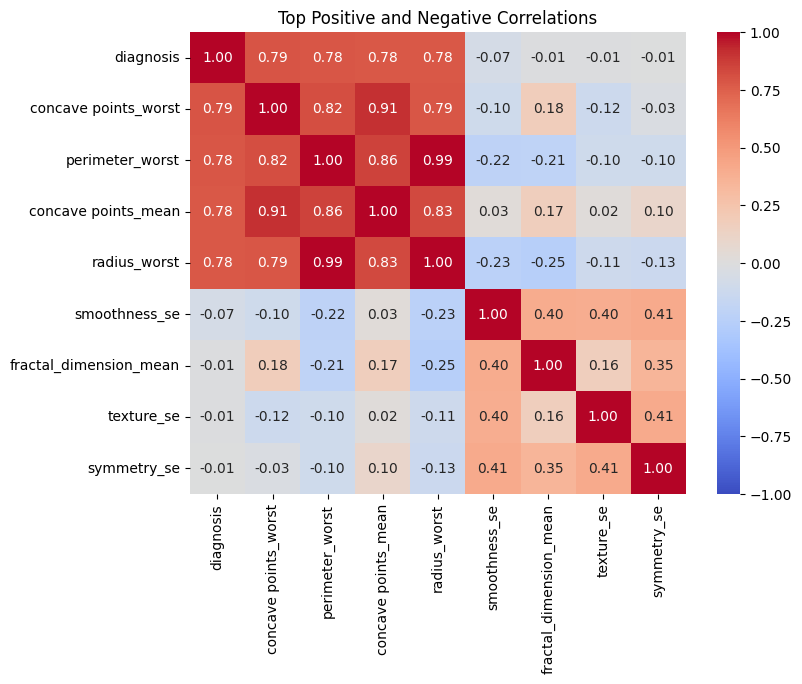

In [36]:
# Calcul des corrélations avec la cible
corr_with_target = corr['diagnosis'].sort_values(ascending=False)

# Paramètres pour sélectionner les corrélations les plus fortes
top_n = 5  


strong_corr_positive = corr_with_target[corr_with_target > 0].nlargest(top_n)
strong_corr_negative = corr_with_target[corr_with_target < 0].nsmallest(top_n)


strong_corr = pd.concat([strong_corr_positive, strong_corr_negative])


relevant_columns = strong_corr.index
filtered_corr = corr.loc[relevant_columns, relevant_columns]

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top Positive and Negative Correlations')
plt.show()

En prenant en compte du taux de corrélation sur la viariable diagnostic (positive ou négative), on conserve les variables avec peu de corrélations entre elles. 

Les variables choisient sont donc:  'concave points_worst',
                                    'smoothness_se',
                                    'perimeter_worst',
                                    'concave points_mean',
                                    'radius_worst',
                                    'fractal_dimension_mean',
                                    'texture_se',
                                    'symmetry_se'

#### Préparations des variables selectionné

In [37]:
variables = [
    'concave points_worst',
    'smoothness_se',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'fractal_dimension_mean',
    'texture_se',
    'symmetry_se'
]

### Histogrammes

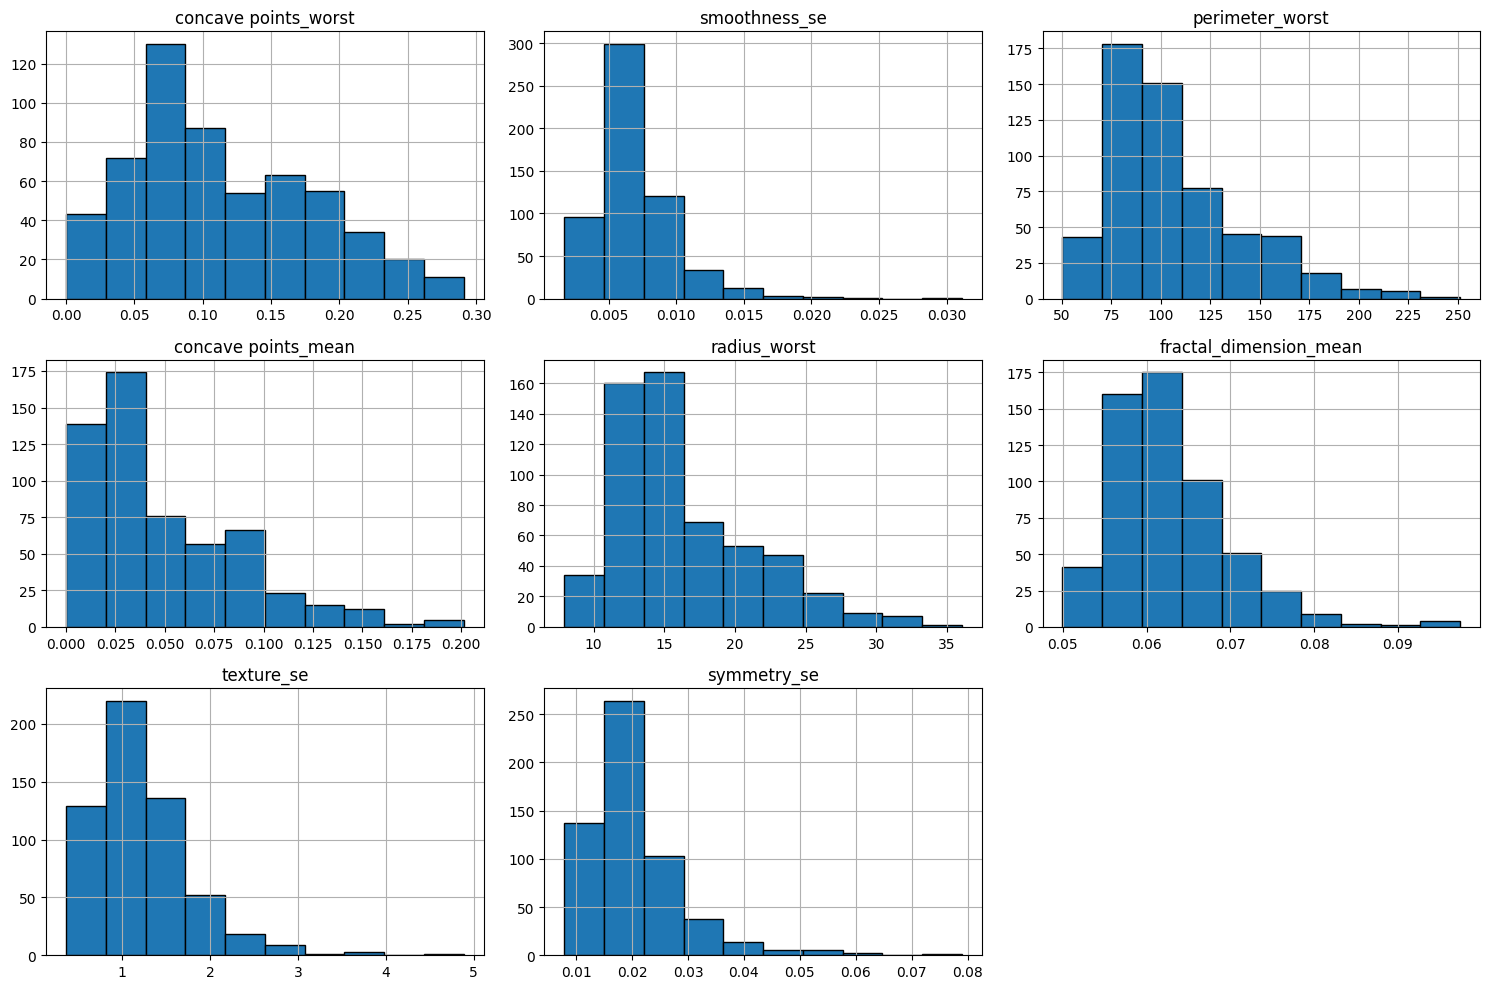

In [38]:
selected_vars = [col for col in variables if col in df.columns]

# Créer des histogrammes pour les colonnes présentes
df[selected_vars].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

####        
        concave points_worst :
                Description : Nombre maximal de points concaves sur le contour des cellules.
                Interprétation : Des valeurs élevées indiquent des contours cellulaires plus irréguliers, souvent associés à des tumeurs malignes.
            
        smoothness_se :
                Description : Erreur standard de la douceur, mesurant la variation locale des longueurs de rayon.
                Interprétation : Une variation accrue peut suggérer des anomalies dans la structure cellulaire.
            
        perimeter_worst :
                Description : Valeur maximale du périmètre des cellules.
                Interprétation : Des périmètres plus grands sont souvent observés dans les tumeurs malignes en raison de leur croissance désorganisée.
            
        concave points_mean :
                Description : Nombre moyen de points concaves sur le contour des cellules.
                Interprétation : Une moyenne élevée peut indiquer une tendance vers des contours cellulaires irréguliers, potentiellement malins.
            
        radius_worst :
                Description : Valeur maximale du rayon, mesurant la distance du centre au point le plus éloigné sur le périmètre.
                Interprétation : Des rayons plus grands peuvent être associés à des tumeurs de taille plus importante, souvent malignes.
            
        fractal_dimension_mean :
                Description : Moyenne de la dimension fractale, quantifiant la complexité du contour cellulaire.
                Interprétation : Des valeurs plus élevées reflètent des contours plus complexes, pouvant indiquer une malignité.
            
        texture_se :
                Description : Erreur standard de la texture, correspondant à l'écart-type des valeurs de gris dans l'image.
                Interprétation : Une variation accrue peut signaler des hétérogénéités dans la structure cellulaire.
            
        symmetry_se :
                Description : Erreur standard de la symétrie, mesurant la variation de la symétrie des cellules.
                Interprétation : Des variations significatives peuvent être liées à des anomalies cellulaires.


### Boxplots

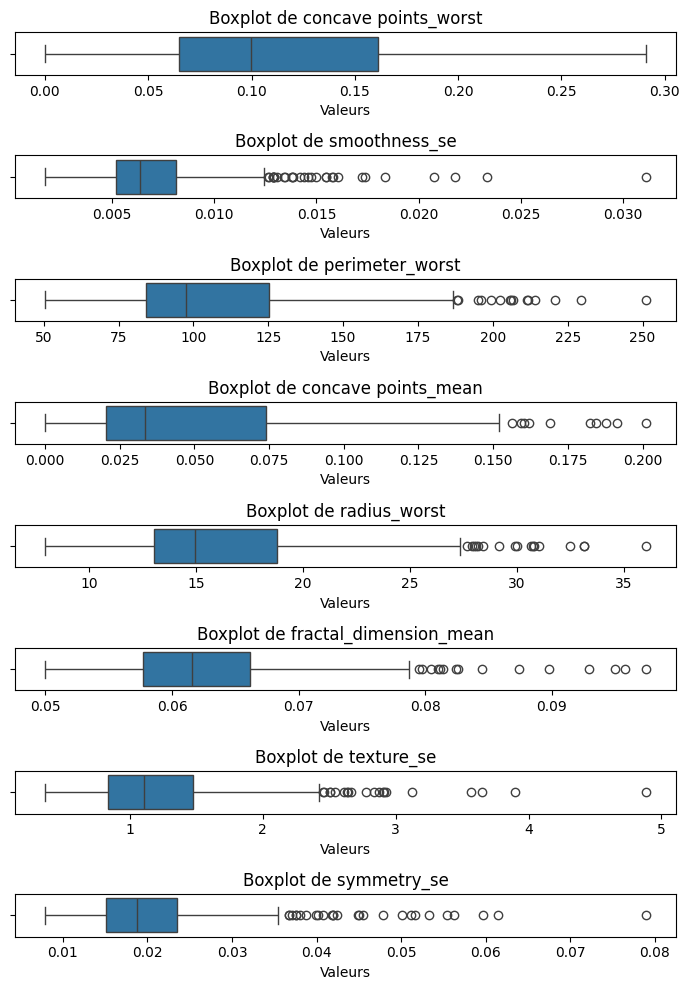

In [39]:
# Définir la taille de la figure
plt.figure(figsize=(7, 10))

# Itérer sur les variables sélectionnées
for i, var in enumerate(selected_vars, 1):
    plt.subplot(len(selected_vars), 1, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('Valeurs')
    plt.tight_layout()

# Afficher les graphiques
plt.show()


####    Les variables concave points_worst, perimeter_worst, et radius_worst montrent une grande variabilité avec plusieurs outliers. Cela peut indiquer des tumeurs plus grandes ou irrégulières, caractéristiques de cas malins.
        Les variables smoothness_se, fractal_dimension_mean, et symmetry_se sont plus concentrées avec des valeurs faibles, mais présentent aussi des outliers significatifs.


### Violin Plots

C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\865982087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=var, data=df, palette='coolwarm')
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\865982087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=var, data=df, palette='coolwarm')
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\865982087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=var, data=df, palette='coolwarm')
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004

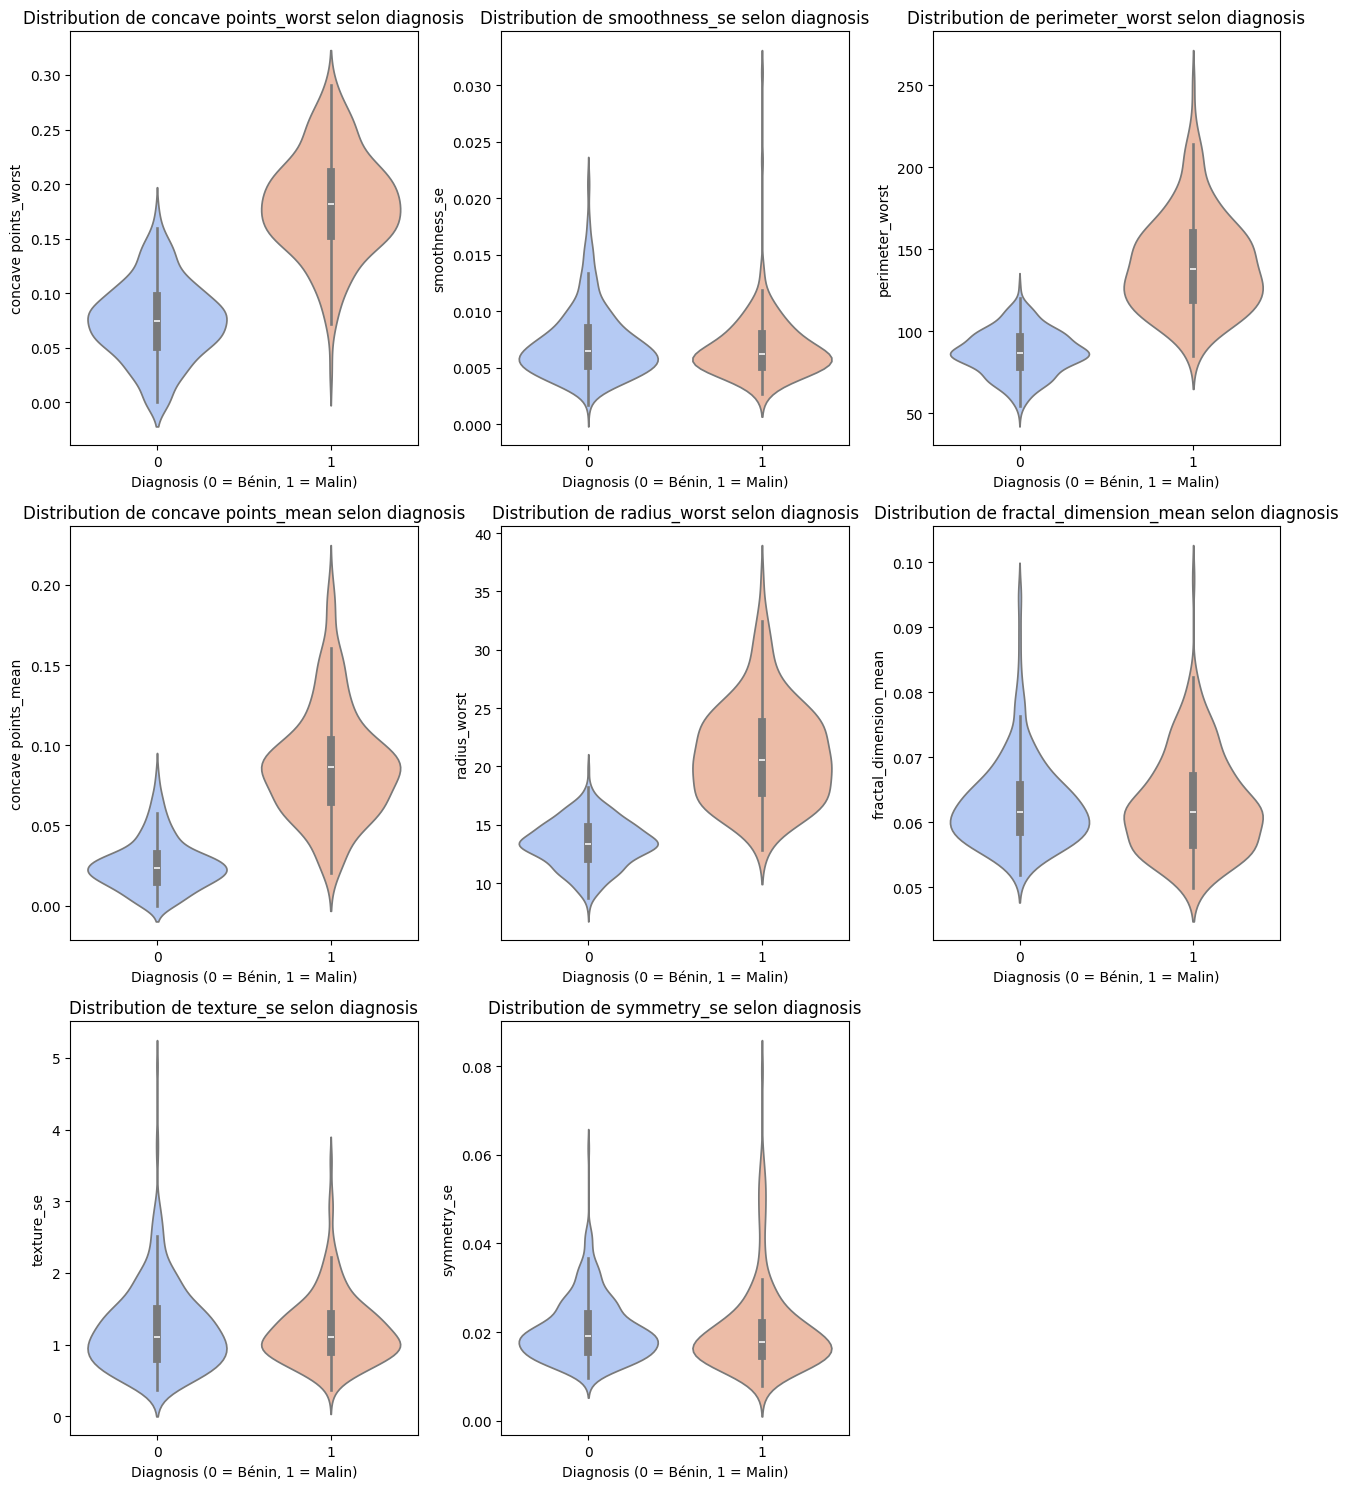

In [40]:

# Génération automatique des Violin Plots
plt.figure(figsize=(13, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='diagnosis', y=var, data=df, palette='coolwarm')
    plt.title(f'Distribution de {var} selon diagnosis')
    plt.xlabel('Diagnosis (0 = Bénin, 1 = Malin)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()



#### Variables discriminantes : concave points_worst, perimeter_worst, radius_worst, et concave points_mean :
        Ces variables montrent des distributions distinctes entre les diagnostics bénins et malins.
        Les valeurs sont en général plus élevées pour les tumeurs malignes (1), avec une séparation visible par rapport aux tumeurs bénignes (0).
        Cela renforce leur utilité comme variables clés pour différencier les deux classes.
        
#### Variables moins discriminantes : smoothness_se, fractal_dimension_mean, texture_se, et symmetry_se :
        Les distributions des diagnostics bénins et malins se chevauchent fortement, ce qui limite leur capacité à discriminer les classes.
        Cependant, des légères différences dans les médianes ou des extrêmes peuvent indiquer des tendances intéressantes à explorer.

### Nuages de points

C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\106679581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\106679581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\106679581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\106679581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

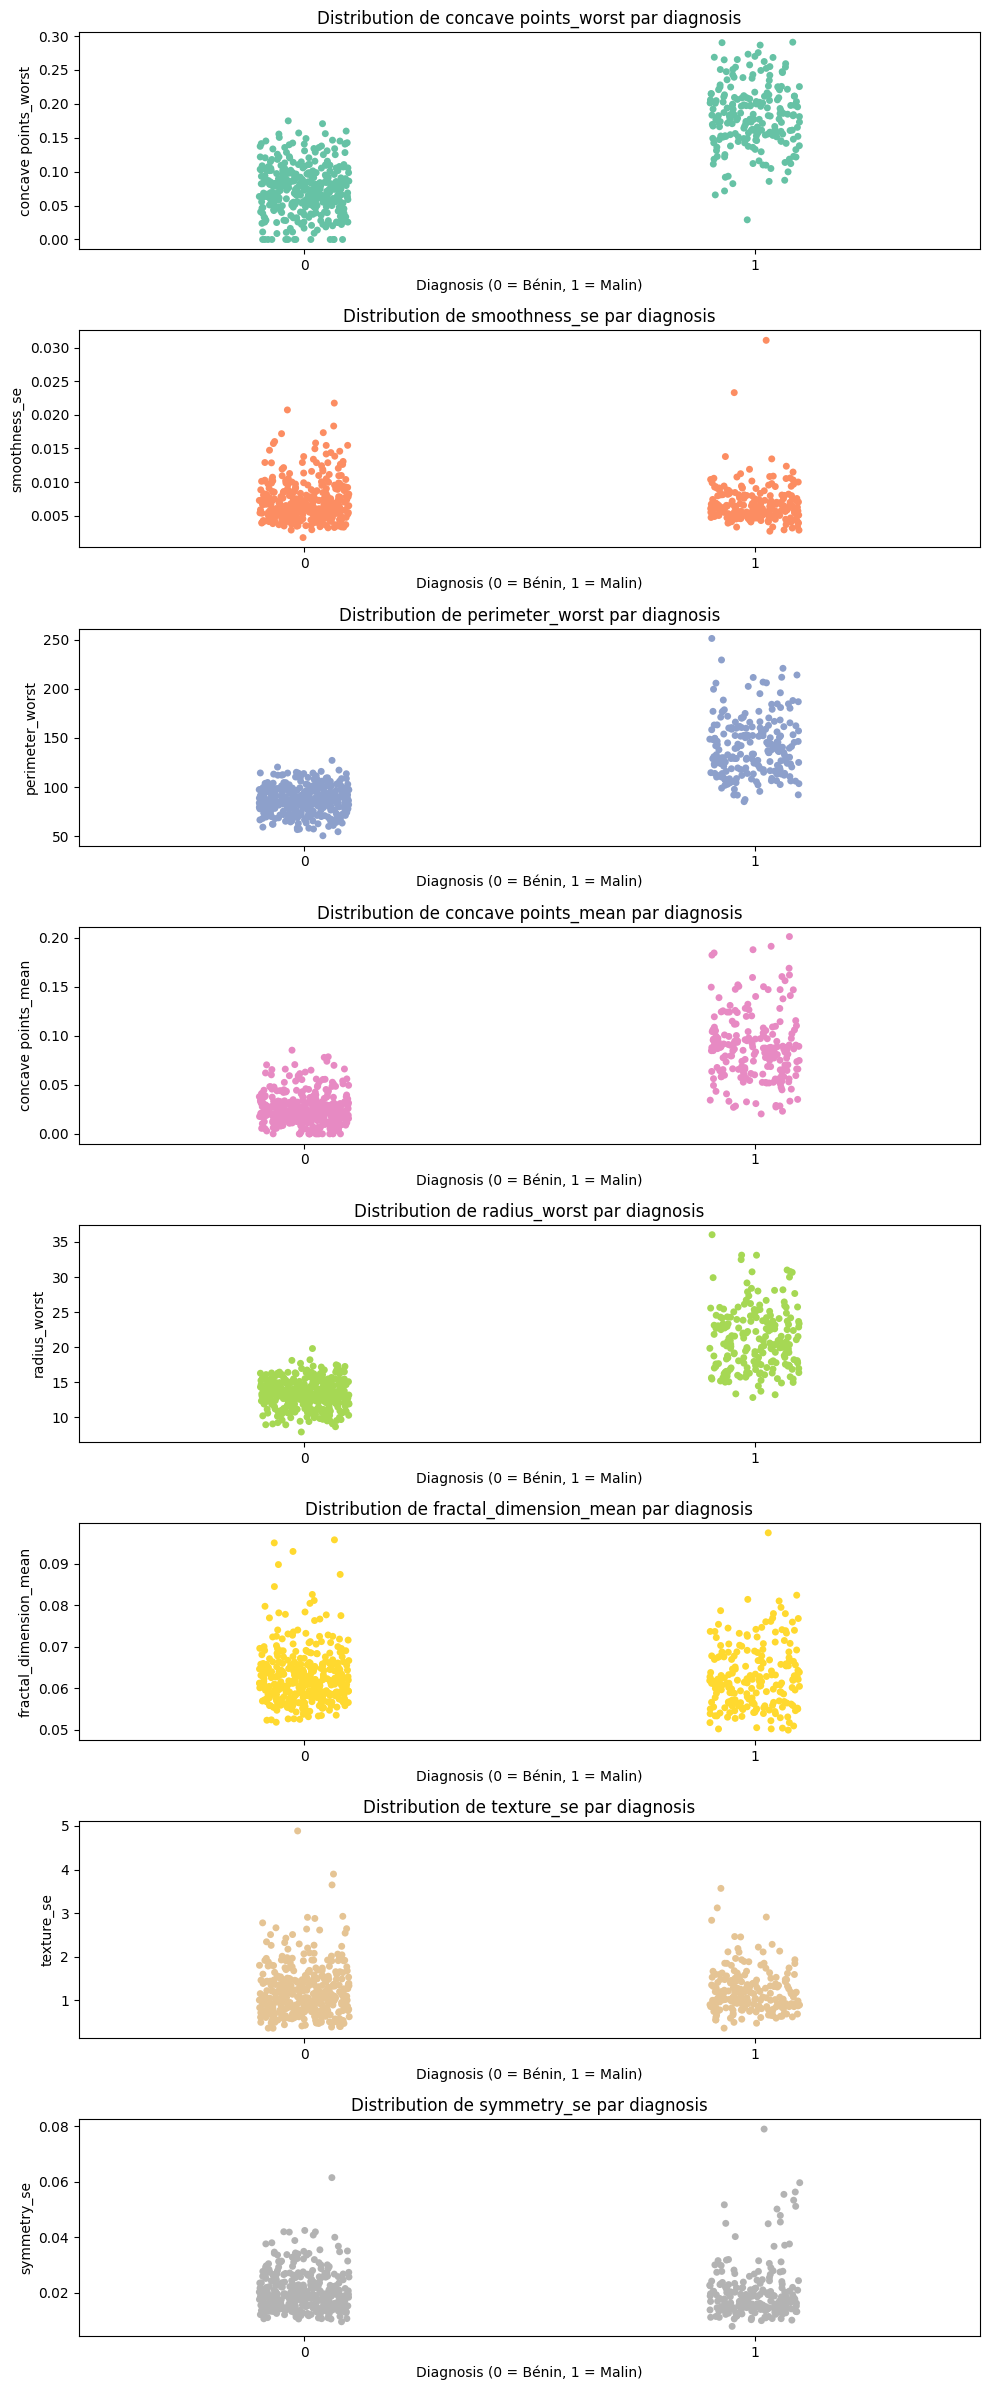

In [41]:
# Liste de couleurs pour chaque variable
colors = sns.color_palette('Set2', len(variables))

plt.figure(figsize=(10, len(variables) * 3))

# Créer un strip plot pour chaque variable avec une couleur unique
for i, (var, color) in enumerate(zip(variables, colors), start=1):
    plt.subplot(len(variables), 1, i)
    sns.stripplot(
        x='diagnosis', y=var, data=df, jitter=True, palette=[color, color]
    )
    plt.title(f'Distribution de {var} par diagnosis', fontsize=12)
    plt.xlabel('Diagnosis (0 = Bénin, 1 = Malin)', fontsize=10)
    plt.ylabel(var, fontsize=10)

plt.tight_layout()
plt.show()

#### Variables concave points_worst, perimeter_worst, et radius_worst :

            Ces variables montrent une grande variabilité avec des valeurs souvent plus élevées pour les tumeurs malignes (diagnostic = 1).
            Cela peut indiquer des tumeurs plus grandes ou présentant des contours irréguliers, caractéristiques de cas malins.
            Les outliers présents renforcent l'idée que certains cas spécifiques peuvent être particulièrement extrêmes.

#### Variables smoothness_se, fractal_dimension_mean, texture_se et symmetry_se :
            Les valeurs sont majoritairement concentrées vers les tumeurs bénignes 
            Ces variables sont plus concentrées avec des valeurs globalement faibles pour les deux diagnostics.
            Cependant, les outliers observés peuvent refléter des cas rares ou des caractéristiques inhabituelles, nécessitant une analyse plus approfondie.

### KDE Plots

C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\1681602556.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 0][var], shade=True, color=color_benin, label='Bénin (0)')
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\1681602556.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 1][var], shade=True, color=color_malin, label='Malin (1)')
C:\Users\aurel\AppData\Local\Temp\ipykernel_16004\1681602556.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 0][var], shade=True, color=color_benin, label='Bénin (0)')
C:\Users\aurel\AppData\Local\Temp\ipykernel

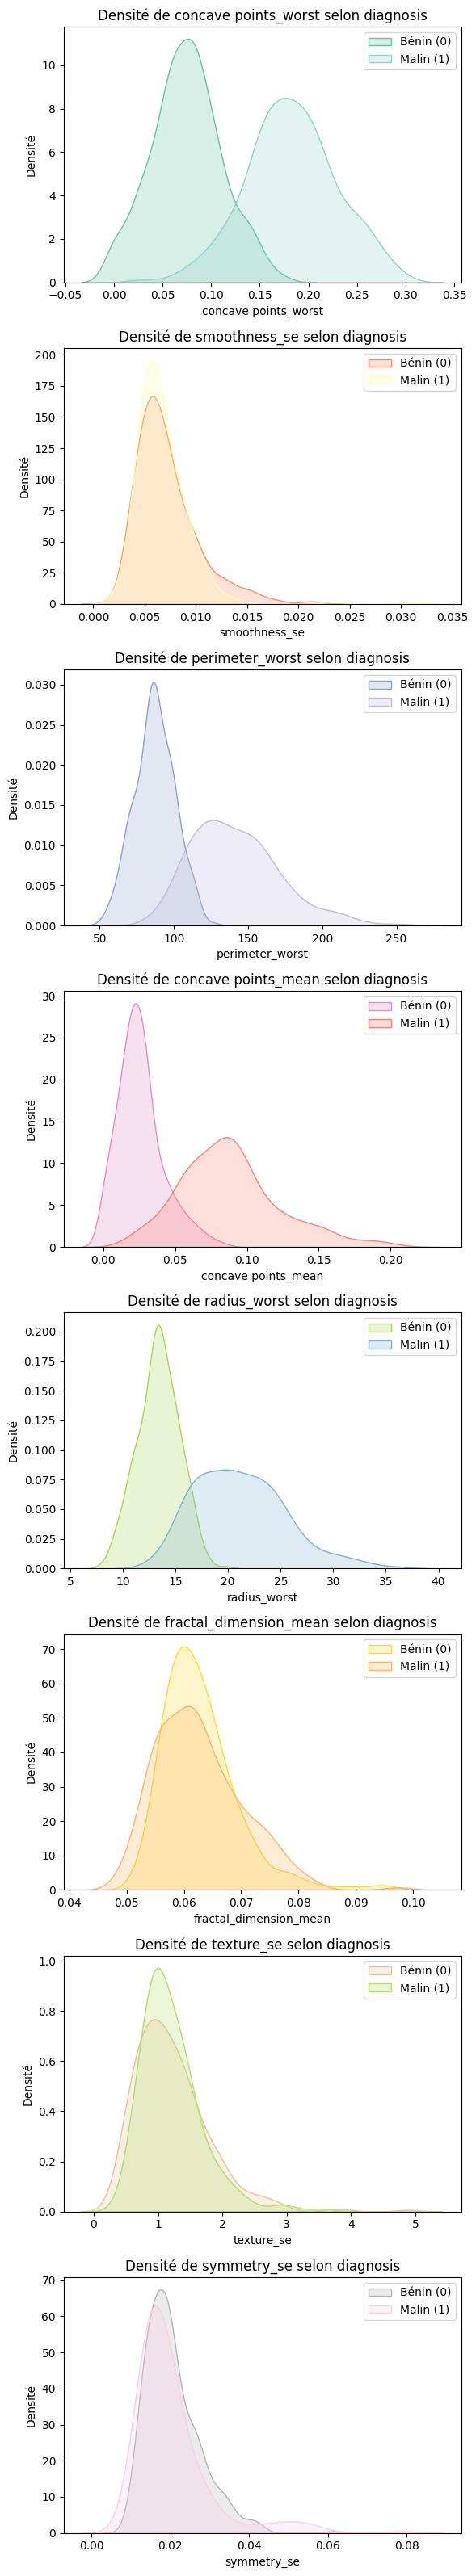

In [42]:
# Liste de couleurs pour chaque variable
colors_benin = sns.color_palette('Set2', len(variables))  
colors_malin = sns.color_palette('Set3', len(variables)) 


plt.figure(figsize=(6, len(variables) * 4))


for i, (var, color_benin, color_malin) in enumerate(zip(variables, colors_benin, colors_malin), start=1):
    plt.subplot(len(variables), 1, i)
    sns.kdeplot(df[df['diagnosis'] == 0][var], shade=True, color=color_benin, label='Bénin (0)')
    sns.kdeplot(df[df['diagnosis'] == 1][var], shade=True, color=color_malin, label='Malin (1)')
    plt.title(f'Densité de {var} selon diagnosis', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Densité', fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()

#### Variables discriminantes : concave points_worst, perimeter_worst, radius_worst, et concave points_mean :
          Ces variables montrent une séparation nette entre les diagnostics bénins et malins.
          Les tumeurs malignes (diagnostic = 1) ont des densités qui se déplacent vers des valeurs plus élevées, tandis que les tumeurs bénignes sont concentrées dans des plages plus basses.
          Cela confirme que ces variables sont fortement discriminantes et utiles pour séparer les deux classes.

#### Variables moins discriminantes : smoothness_se, fractal_dimension_mean, texture_se, et symmetry_se :
          Les distributions des tumeurs bénignes et malignes se chevauchent largement.
          Ces variables ne montrent pas une séparation claire entre les deux classes.


### Réduction de dimension utilisant l'ACP (Analyse en Composantes Principales)

Tout d'abord, on sépare la variable cible (y) des variables explicatives (X)

In [43]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

Puis on normalise les données à l'aide de StandardScaler

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

On applique ensuite l'ACP

In [45]:
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

Et on affiche le nombre de composantes principales conservées

In [46]:
print(f"Nombre de composantes principales conservées : {pca.n_components_}")

Nombre de composantes principales conservées : 11


On effectue par la suite une séparation des données pour le modèle

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Et pour terminer, on affiche les dimensions des données après réduction

In [49]:
print(f"Dimensions originales : {X.shape}")
print(f"Dimensions après ACP : {X_pca.shape}")

Dimensions originales : (569, 31)
Dimensions après ACP : (569, 11)


## Tests des perceptrons

#### Perceptron Aurélien

In [57]:
from perceptron_aure import Perceptron 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Tout d'abord, on crée une instance de la classe custom du Perceptron et on entraîne le modèle sur les données d'entrainement

In [59]:
model = Perceptron(max_iter=1000, tol=0.001)

model.fit(X_train, y_train)

Perceptron()

Puis on lance une prédiction sur les données de test

In [60]:
y_pred = model.predict(X_test)

On évalue ensuite la performance du modèle et on les affiche

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



Et pour terminer on affiche une matrice de confusion afin de voir la répartition des prédictions

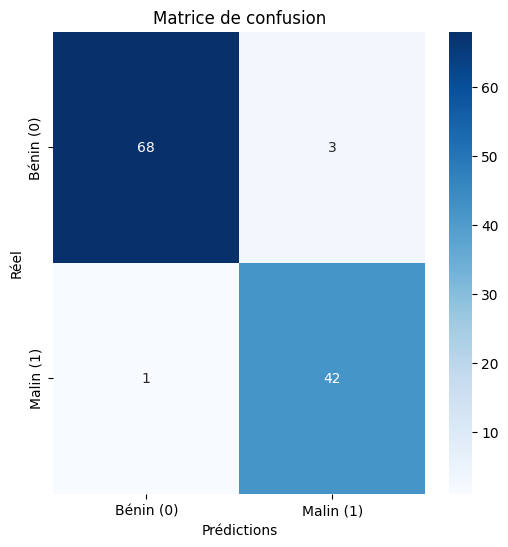

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Bénin (0)", "Malin (1)"], yticklabels=["Bénin (0)", "Malin (1)"])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()


#### Perceptron Matthieu

#### Perceptron Tom